### What I am Aiming For in This Project

In this project, i am going to work on the 'Credit Card Dataset for Clustering' dataset provided by Kaggle.

Dataset description : This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link: https://drive.google.com/file/d/1Yb4ljRXRQfTmcLOac_5w-pLpvPdFPvnc/view?usp=sharing

#### Columns explanation : 

- CUST_ID: Identification of Credit Card holder (Categorical)
- BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES: Amount of purchases made from account 
- CASH_ADVANCE: Cash in advance given by the user
- CREDIT_LIMIT: Limit of Credit Card for user 
- PAYMENTS: Amount of Payment done by user 

### Instructions

- Import your data and perform basic data exploration phase
- Perform the necessary data preparation steps ( Corrupted and missing values handling, data encoding, outliers handling ... )
- Perform hierarchical clustering to identify the inherent groupings within your data. Then, plot the clusters. (use only 2 features. For example, try to cluster the customer base with respect to 'PURCHASES' and 'credit limit')
- Perform partitional clustering using the K-means algorithm. Then, plot the clusters
- Find the best k value and plot the clusters again.
- Interpret the results

## Importing the Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns
from sklearn.cluster import KMeans

### Loading the Data

### The Dataset

This dataset was derived and simplified for learning purposes. It includes usage behaviour of about 9000 active credit card holders during 6 months period. This case requires to develop a customer segmentation to define marketing strategy.

➡️ Dataset link: https://drive.google.com/file/d/1Yb4ljRXRQfTmcLOac_5w-pLpvPdFPvnc/view?usp=sharing

In [2]:
df = pd.read_csv("Credit_card_dataset.csv")

In [3]:
df

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,C10001,0.818182,95.40,201.802084,1000.0,0.000000
1,C10002,0.909091,0.00,4103.032597,7000.0,6442.945483
2,C10003,1.000000,773.17,622.066742,7500.0,0.000000
3,C10004,0.636364,1499.00,0.000000,7500.0,205.788017
4,C10005,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...,...
8945,C19186,1.000000,291.12,325.594462,1000.0,0.000000
8946,C19187,1.000000,300.00,275.861322,1000.0,0.000000
8947,C19188,0.833333,144.40,81.270775,1000.0,0.000000
8948,C19189,0.833333,0.00,52.549959,500.0,36.558778


### Performing Basic Data Exploration

In [4]:
# Displaying general information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CUST_ID            8950 non-null   object 
 1   BALANCE_FREQUENCY  8950 non-null   float64
 2   PURCHASES          8950 non-null   float64
 3   PAYMENTS           8950 non-null   float64
 4   CREDIT_LIMIT       8949 non-null   float64
 5   CASH_ADVANCE       8950 non-null   float64
dtypes: float64(5), object(1)
memory usage: 419.7+ KB


In [5]:
from ydata_profiling import ProfileReport

C:\Users\Okoye Emmanuel\anaconda3\Lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
C:\Users\Okoye Emmanuel\anaconda3\Lib\site-packages\visions\backends\shared\nan_handling.py:50: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @nb.jit


In [6]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Handling Missing and corrupted values
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         1
CASH_ADVANCE         0
dtype: int64

In [8]:
df[df.duplicated()]

,CUST_ID,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE


In [9]:
df.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000
mean,0.877271,1003.204834,1733.143852,4494.449450,978.871112
std,0.236904,2136.634782,2895.063757,3638.815725,2097.163877
min,0.000000,0.000000,0.000000,50.000000,0.000000
25%,0.888889,39.635000,383.276166,1600.000000,0.000000
50%,1.000000,361.280000,856.901546,3000.000000,0.000000
75%,1.000000,1110.130000,1901.134317,6500.000000,1113.821139
max,1.000000,49039.570000,50721.483360,30000.000000,47137.211760


### Data Cleaning

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

CUST_ID              0
BALANCE_FREQUENCY    0
PURCHASES            0
PAYMENTS             0
CREDIT_LIMIT         0
CASH_ADVANCE         0
dtype: int64

In [12]:
pd.get_dummies(df.CUST_ID)

,C10001,C10002,C10003,C10004,C10005,C10006,C10007,C10008,C10009,C10010,...,C19181,C19182,C19183,C19184,C19185,C19186,C19187,C19188,C19189,C19190
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8948,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [13]:
df.drop(columns=["CUST_ID"], inplace= True)

In [14]:
df

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


In [15]:
Q1 = df.PAYMENTS.quantile(0.25)
Q3 = df.PAYMENTS.quantile(0.75)
Q1, Q3

(383.28285, 1901.27932)

In [16]:
IQR = Q3 - Q1
IQR

1517.99647

In [17]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1893.711855, 4178.274025000001)

In [18]:
df_no_outlier = df[(df.PAYMENTS > lower_limit) & (df.PAYMENTS < upper_limit)]
df_no_outlier

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.818182,95.40,201.802084,1000.0,0.000000
1,0.909091,0.00,4103.032597,7000.0,6442.945483
2,1.000000,773.17,622.066742,7500.0,0.000000
3,0.636364,1499.00,0.000000,7500.0,205.788017
4,1.000000,16.00,678.334763,1200.0,0.000000
...,...,...,...,...,...
8945,1.000000,291.12,325.594462,1000.0,0.000000
8946,1.000000,300.00,275.861322,1000.0,0.000000
8947,0.833333,144.40,81.270775,1000.0,0.000000
8948,0.833333,0.00,52.549959,500.0,36.558778


### Tranform Data
Normalizing the data using normalize from sklearn.
This is to account to variotion in measurement units. its a common practice prior to machine learning to normalize or standardise the data.

In [20]:
data_scaled = normalize(df_no_outlier)

In [21]:
data_scaled

array([[7.98530074e-04, 9.31085860e-02, 1.96954997e-01, 9.75980985e-01,
        0.00000000e+00],
       [8.77432200e-05, 0.00000000e+00, 3.96014581e-01, 6.75622726e-01,
        6.21857199e-01],
       [1.32181315e-04, 1.02198627e-01, 8.22255998e-02, 9.91359861e-01,
        0.00000000e+00],
       ...,
       [8.22122916e-04, 1.42457516e-01, 8.01775119e-02, 9.86547894e-01,
        0.00000000e+00],
       [1.65316928e-03, 0.00000000e+00, 1.04248815e-01, 9.91901966e-01,
        7.25254476e-02],
       [4.09119437e-04, 6.70904401e-01, 3.87632724e-02, 7.36414618e-01,
        7.79617658e-02]])

In [22]:
data_scaled = pd.DataFrame(data_scaled, columns=df_no_outlier.columns)

In [23]:
data_scaled.head()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
0,0.000799,0.093109,0.196955,0.975981,0.000000
1,0.000088,0.000000,0.396015,0.675623,0.621857
2,0.000132,0.102199,0.082226,0.991360,0.000000
3,0.000083,0.195920,0.000000,0.980251,0.026897
4,0.000725,0.011606,0.492065,0.870481,0.000000


In [24]:
data_scaled.describe()

,BALANCE_FREQUENCY,PURCHASES,PAYMENTS,CREDIT_LIMIT,CASH_ADVANCE
count,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,0.000309,0.168312,0.262092,0.855965,0.149754
std,0.000267,0.186403,0.198106,0.159212,0.220348
min,0.000000,0.000000,0.000000,0.090440,0.000000
25%,0.000127,0.010217,0.111954,0.780259,0.000000
50%,0.000221,0.102755,0.208256,0.917058,0.000000
75%,0.000414,0.269867,0.369819,0.975150,0.269545
max,0.003510,0.865314,0.983628,1.000000,0.885087


### Clustering The Data
Using hierarchical clustering to identify the inherent groupings within the data

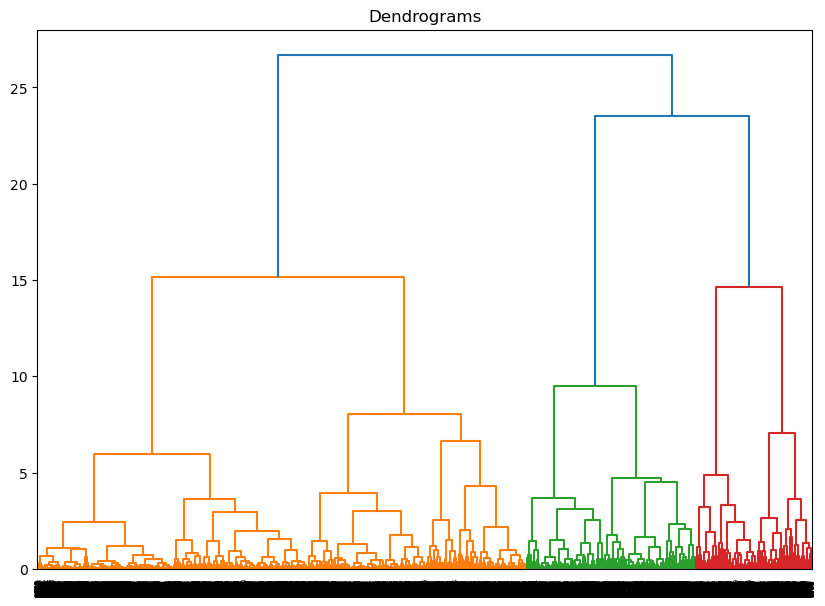

In [32]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
plt.xticks(rotation = 45)
dend = shc.dendrogram(shc.linkage(data_scaled, method="ward"))
plt.show()

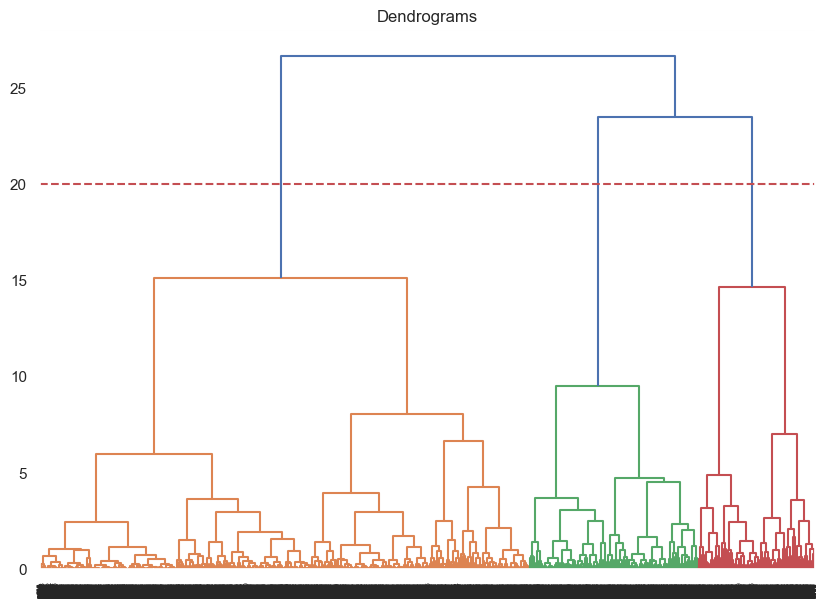

In [120]:
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(data_scaled, method="ward"))
plt.axhline(y=20, color= "r", linestyle= "--")

In [42]:
 #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')
clust_labels=model.fit_predict(data_scaled)
clust_labels

array([1, 0, 1, ..., 1, 1, 3], dtype=int64)

In [57]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,1
1,0
2,1
3,1
4,1
...,...
8136,1
8137,1
8138,1
8139,1


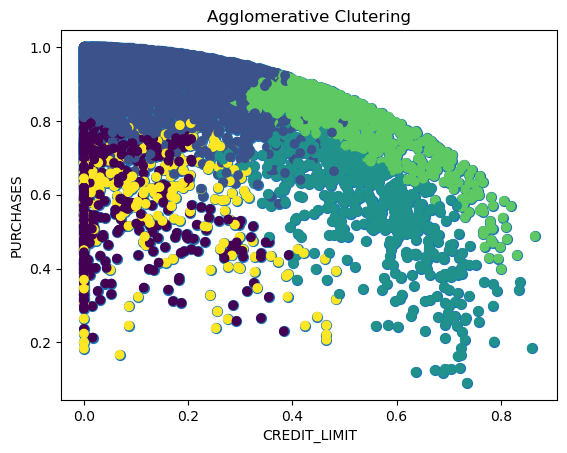

In [54]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data_scaled['PURCHASES'] , data_scaled["CREDIT_LIMIT"] ,  s=50)
ax.set_title("Agglomerative Clutering")
ax.set_xlabel("CREDIT_LIMIT")
ax.set_ylabel("PURCHASES")
plt.scatter(data_scaled['PURCHASES'] , data_scaled["CREDIT_LIMIT"], c=agglomerative);

### Identifying the optimum number of clusters using Elbow Method

In [106]:
X = data_scaled.values[:, 1:3]
X

array([[0.09310859, 0.196955  ],
       [0.        , 0.39601458],
       [0.10219863, 0.0822256 ],
       ...,
       [0.14245752, 0.08017751],
       [0.        , 0.10424882],
       [0.6709044 , 0.03876327]])

In [107]:
sum_of_squared_distance = []
k = range(1,15)
for k in k:
    km = KMeans(n_clusters=k, n_init="auto", random_state=42)
    km = km.fit(X)
    sum_of_squared_distance.append(km.inertia_)

In [108]:
kmeans.inertia_

26019342664.421017

In [109]:
sum_of_squared_distance

[602.2952064259797,
 309.91622895781296,
 197.90058661257947,
 147.31794586908413,
 119.34655768990164,
 100.53859841878571,
 83.66311632852072,
 72.57447949493066,
 65.6430029577867,
 58.01134240319735,
 53.46063995132829,
 48.1827850722294,
 44.93378181416641,
 40.5684442186576]

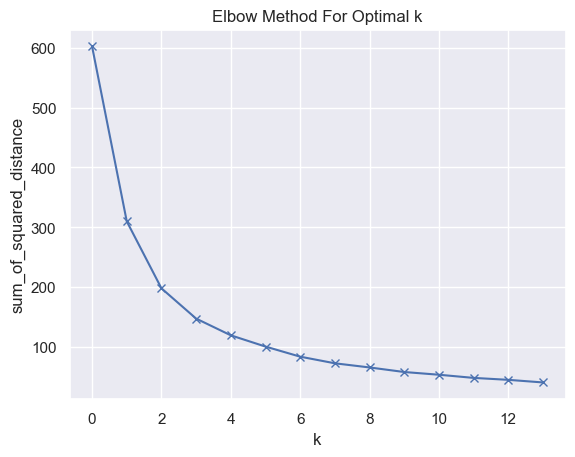

In [118]:
plt.plot(sum_of_squared_distance, "bx-")
plt.xlabel("k")
plt.ylabel("sum_of_squared_distance")
plt.title("Elbow Method For Optimal k")
plt.show()

### Applying K Means Clustering

In [114]:
kmeans = KMeans(n_clusters=3, n_init="auto", init="k-means++", random_state=42)
Y = kmeans.fit_predict(X)
print(Y)

[0 2 0 ... 0 0 1]


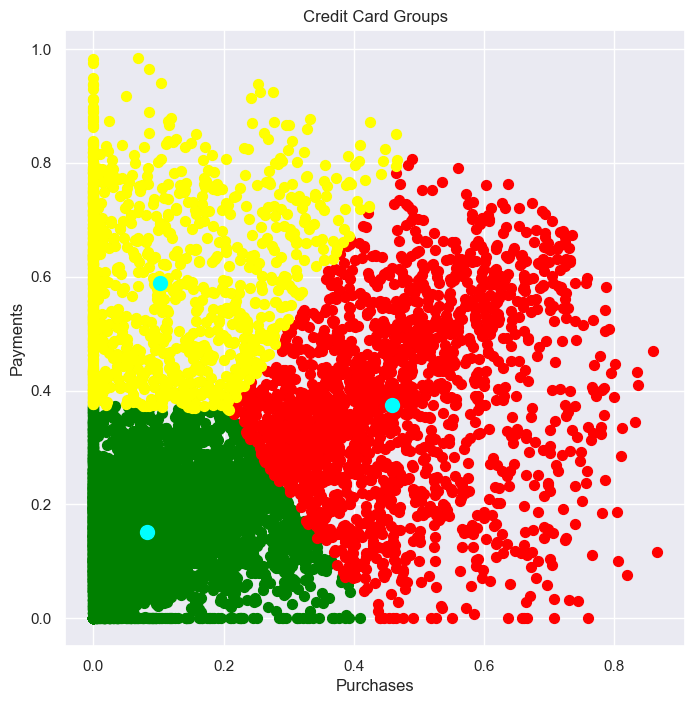

In [116]:
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c="green", label="Cluster 1")
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c="red", label="Cluster 2")
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c="yellow", label="Cluster 3")
# plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c="violet", label="Cluster 4")
# plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c="blue", label="Cluster 5")

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="cyan", label="Centroids")

plt.title("Credit Card Groups")
plt.xlabel("Purchases")
plt.ylabel("Payments");

### Conclusion

After making using of 2 clustering methods hierarchical and kmeans, both had 3 clusters. 